# PREDIKSI HARGA SAHAM DALAM 5 PERIODE WAKTU PER TAHUN PADA 5 PERUSAHAAN.

# **PERUSAHAAN APPLE**

In [ ]:
# IMPORT LIBRARY PYTHON YANG DIBUTUHKAN
import pandas as pd # untuk manipulasi dan analisis data.
import numpy as np # untuk komputasi numerik.
import matplotlib.pyplot as plt # untuk visualisasi data dalam bentuk grafik.
from sklearn.linear_model import LinearRegression # untuk melakukan regresi linear.
from sklearn.model_selection import train_test_split # untuk membagi dataset menjadi dua set: pelatihan model dan pengujian model.
from sklearn.metrics import mean_squared_error, r2_score # untuk mengevaluasi performa model regresi (mse dan r2).

In [ ]:
# MEMBACA DATASET DARI GOOGLE COLAB
df = pd.read_csv('aapl.us.csv')
df.info()# Menampilkan informasi data untuk mengidentifikasi missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8364 entries, 0 to 8363
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8364 non-null   object 
 1   Open     8364 non-null   float64
 2   High     8364 non-null   float64
 3   Low      8364 non-null   float64
 4   Close    8364 non-null   float64
 5   Volume   8364 non-null   int64  
 6   OpenInt  8364 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 457.5+ KB


In [ ]:
# KONVERSI TIPE DATA DATETIME
df['Date'] = pd.to_datetime(df['Date']) # Mengkonversi tipe data pada kolom 'Date' menjadi Datetime.
df.set_index('Date', inplace=True) # Mengubah kolom 'Date' menjadi yang terbaru
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [ ]:
# RESAMPLING DATA TAHUNAN
df_yearly = df['Close'].resample('Y').last()  # Mengambil Harga Penutupan Tahunan
                                              # (.resample('Y') = merubah frekuensi data menjadi interval Year dan
                                              # .last() = mengambil nilai terakhir di setiap periode tahun (Y))
df_yearly

<ipython-input-5-6de2561b15b9>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df['Close'].resample('Y').last()  # Mengambil Harga Penutupan Tahunan


,Close
Date,
1984-12-31,0.46487
1985-12-31,0.35089
1986-12-31,0.64670
1987-12-31,1.34470
1988-12-31,1.28830
1989-12-31,1.12830
1990-12-31,1.37690
1991-12-31,1.80580
1992-12-31,1.91320


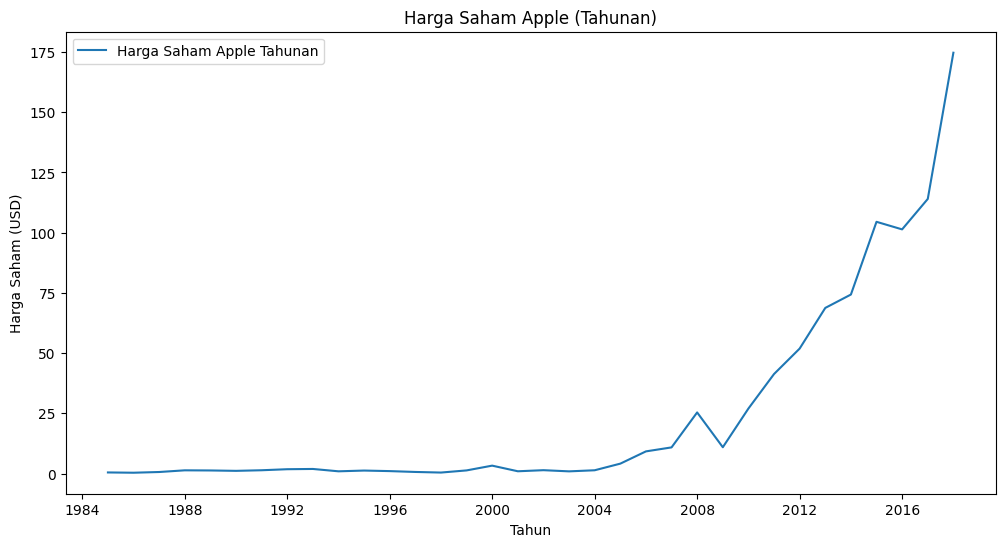

In [ ]:
# Visualisasi data tahunan
plt.figure(figsize=(12,6))
plt.plot(df_yearly, label='Harga Saham Apple Tahunan')
plt.title('Harga Saham Apple (Tahunan)')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# MEMBUAT HARGA PENUTUPAN SEBELUMNYA, SERTA MEMBUAT VARIABEL BEBAS (X) DAN VARIABEL TIDAK BEBAS (Y)
df_yearly = df_yearly.reset_index() # Membuat kolom yearly baru dan mereset kembali indeks dari 0
df_yearly['Year'] = df_yearly['Date'].dt.year  # Membuat kolom 'Year' berisi tahun dari kolom 'Date'
df_yearly['Prev Close'] = df_yearly['Close'].shift(1)  # Menentukan harga saham sebelumnya
                                                       # (shift(1) = untuk menggeser nilai kolom 'Close' ke bawah sebanyak satu baris.)
df_yearly = df_yearly.dropna()  # Menghapus nilai kosong yang terbentuk

# Menentukan X dan Y
X = df_yearly[['Prev Close']]  # VARIABEL BEBAS (X) : Harga tahun penutupan sebelumnya.
Y = df_yearly['Close']  # VARIABEL TIDAK BEBAS (Y) : Harga tahun penutupan ini.

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 80% DATA LATIH, 20% DATA TEST

# Membuat dan melatih model regresi linear
model = LinearRegression() # Membuat model menggunakan Regresi Linear.
model.fit(X_train, Y_train) # Melatih data latih menggunakan model.

# Membuat prediksi pada data pengujian
predictions = model.predict(X_test)
# Evaluasi model
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 34.434184068875815
R-squared: 0.9788154129110453


<class 'pandas.core.series.Series'>
Index: 7 entries, 32 to 20
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
7 non-null      float64
dtypes: float64(1)
memory usage: 112.0 bytes


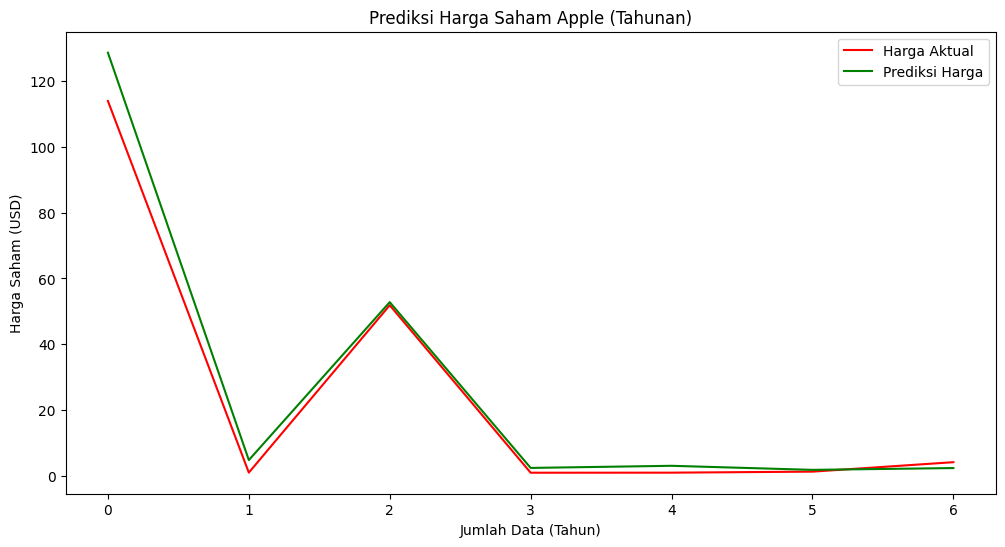

In [ ]:
# Visualisasi hasil prediksi dan data aktual
Y_test.info()
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Harga Aktual', color='red')
plt.plot(predictions, label='Prediksi Harga', color='green')
plt.title('Prediksi Harga Saham Apple (Tahunan)')
plt.xlabel('Jumlah Data (Tahun)')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# Prediksi 5 tahun ke depan berdasarkan model yang telah dilatih
# Menggunakan harga tahun terakhir (tahun terakhir dalam data pelatihan) untuk prediksi
last_year_close = df_yearly['Close'].iloc[-1]
predictions_5_years = []

# Lakukan prediksi untuk 5 tahun ke depan
for _ in range(5):
    next_year_pred = model.predict(np.array([[last_year_close]]))
    predictions_5_years.append(next_year_pred[0])
    last_year_close = next_year_pred[0]  # Update harga untuk tahun berikutnya

# Menampilkan prediksi 5 tahun ke depan
predicted_years = [df_yearly['Year'].iloc[-1] + i for i in range(1, 6)]
predictions_5_years_df = pd.DataFrame({'Year': predicted_years, 'Predicted Close': predictions_5_years})

print("Prediksi Harga Saham Apple untuk 5 Tahun Kedepan:")
print(predictions_5_years_df)

Prediksi Harga Saham Apple untuk 5 Tahun Kedepan:
   Year  Predicted Close
0  2018       221.324779
1  2019       280.279363
2  2020       354.776405
3  2021       448.913432
4  2022       567.868219


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


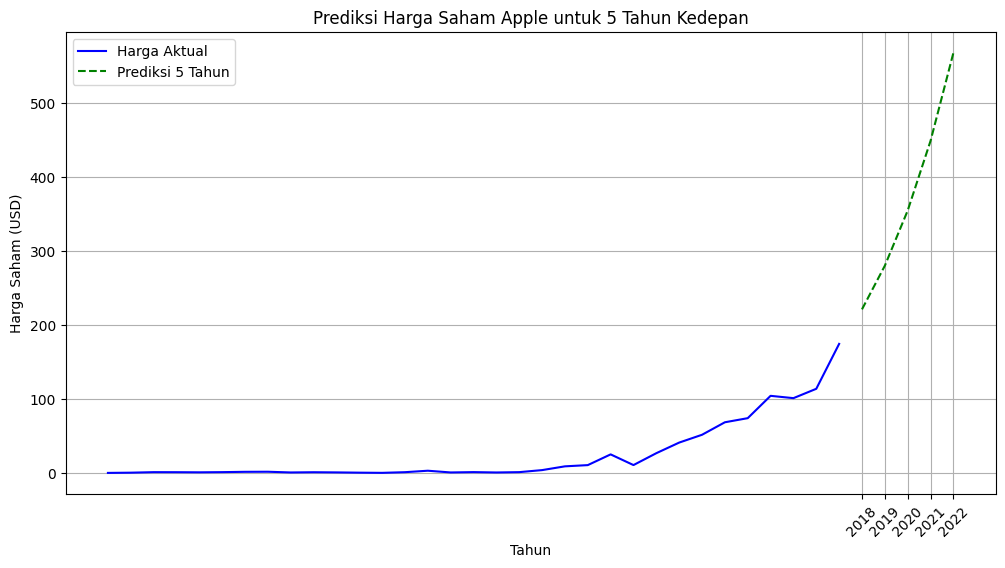

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi prediksi 5 tahun ke depan
plt.figure(figsize=(12,6))
plt.plot(df_yearly['Year'], df_yearly['Close'], label='Harga Aktual', color='blue')
plt.plot(predictions_5_years_df['Year'], predictions_5_years_df['Predicted Close'],
         label='Prediksi 5 Tahun', color='green', linestyle='--')

# Menambahkan judul dan label
plt.title('Prediksi Harga Saham Apple untuk 5 Tahun Kedepan')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham (USD)')

# Menampilkan label pertahunnya pada sumbu X
plt.xticks(predictions_5_years_df['Year'], rotation=45)  # Atur agar setiap tahun muncul pada sumbu-X

# Menampilkan legenda dan grafik
plt.legend()
plt.grid(True)
plt.show()


**AKHIR**

# **PERUSAHAAN AMAZON**



In [ ]:
# Mengimpor pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# MEMBACA DATASET DARI GOOGLE COLAB
df = pd.read_csv('amzn.us.csv')
df.info() # Menampilkan informasi data untuk mengidentifikasi missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     5153 non-null   object 
 1   Open     5153 non-null   float64
 2   High     5153 non-null   float64
 3   Low      5153 non-null   float64
 4   Close    5153 non-null   float64
 5   Volume   5153 non-null   int64  
 6   OpenInt  5153 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 281.9+ KB


In [ ]:
# KONVERSI TIPE DATA DATETIME
df['Date'] = pd.to_datetime(df['Date']) # Mengkonversi tipe data pada kolom 'Date' menjadi Datetime.
df.set_index('Date', inplace=True) # Mengubah kolom 'Date' menjadi yang terbaru
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1997-05-19,1.76,1.77,1.62,1.71,6106800,0
1997-05-20,1.73,1.75,1.64,1.64,5467200,0
1997-05-21,1.64,1.65,1.38,1.43,18853200,0
1997-05-22,1.44,1.45,1.31,1.40,11776800,0


In [ ]:
# Mengambil data bulanan menggunakan resampling
df_monthly = df['Close'].resample('M').last()  # Mengambil harga penutupan bulanan
df_monthly

<ipython-input-14-1b09ae7c93a1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').last()  # Mengambil harga penutupan bulanan


,Close
Date,
1997-05-31,1.50
1997-06-30,1.54
1997-07-31,2.40
1997-08-31,2.34
1997-09-30,4.34
...,...
2017-07-31,987.78
2017-08-31,980.60
2017-09-30,961.35


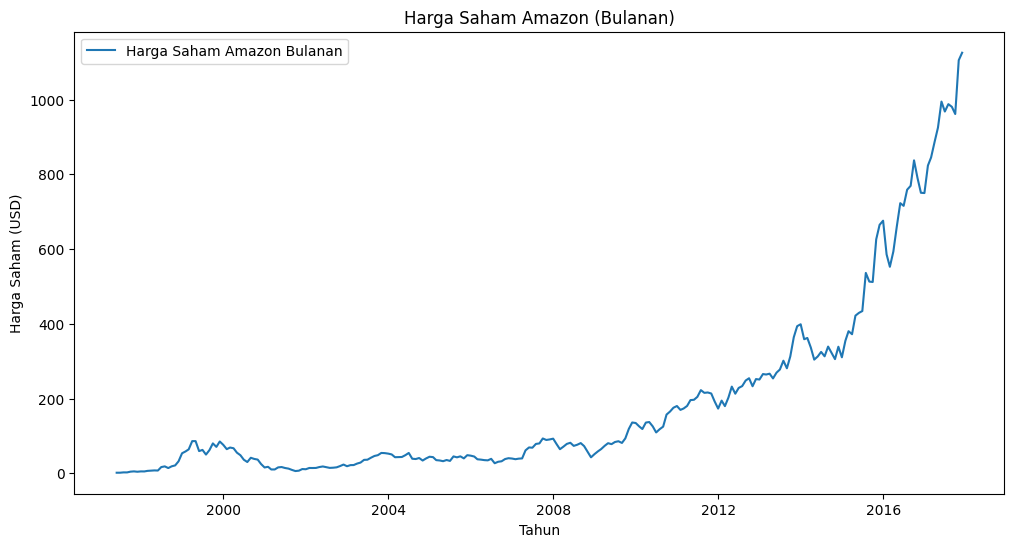

In [ ]:
# Visualisasi data bulanan
plt.figure(figsize=(12,6))
plt.plot(df_monthly, label='Harga Saham Amazon Bulanan')
plt.title('Harga Saham Amazon (Bulanan)')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# Membuat fitur (X) dan target (Y)
df_monthly = df_monthly.reset_index()
df_monthly['Month'] = df_monthly['Date'].dt.month  # Ekstrak bulan
df_monthly['Prev Close'] = df_monthly['Close'].shift(1)  # Harga saham bulan sebelumnya
df_monthly = df_monthly.dropna()  # Menghapus NaN yang terbentuk

# Menentukan fitur dan target
X = df_monthly[['Prev Close']]  # Fitur: harga saham sebelumnya
Y = df_monthly['Close']  # Target: harga saham bulan ini

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, Y_train)

# Membuat prediksi pada data pengujian
predictions = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 432.7674380672769
R-squared: 0.9871675841292518


<class 'pandas.core.series.Series'>
Index: 49 entries, 25 to 197
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
49 non-null     float64
dtypes: float64(1)
memory usage: 784.0 bytes


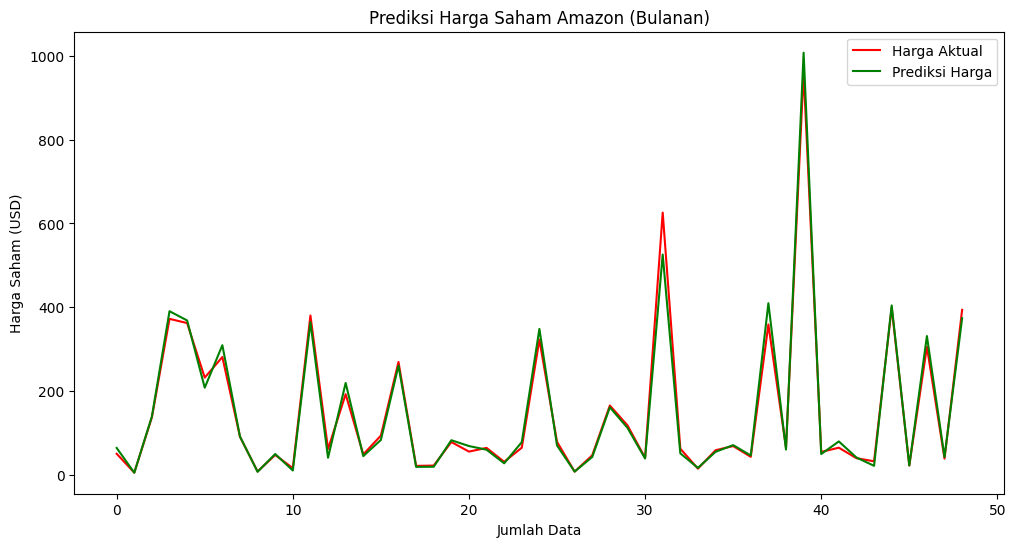

In [ ]:
# Visualisasi hasil prediksi dan data aktual
Y_test.info()
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Harga Aktual', color='red')
plt.plot(predictions, label='Prediksi Harga', color='green')
plt.title('Prediksi Harga Saham Amazon (Bulanan)')
plt.xlabel('Jumlah Data')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# Prediksi 5 bulan ke depan berdasarkan model yang telah dilatih
# Menggunakan harga bulan terakhir (bulan terakhir dalam data pelatihan) untuk prediksi
last_month_close = df_monthly['Close'].iloc[-1]
predictions_5_months = []

# Lakukan prediksi untuk 5 bulan ke depan
for _ in range(5):  # Mengubah 6 menjadi 5 untuk prediksi 5 bulan
    next_month_pred = model.predict(np.array([[last_month_close]]))
    predictions_5_months.append(next_month_pred[0])
    last_month_close = next_month_pred[0]  # Update harga untuk bulan berikutnya

# Menampilkan prediksi 5 bulan ke depan
predicted_months = [df_monthly['Date'].iloc[-1] + pd.DateOffset(months=i) for i in range(1, 6)]  # Ubah 6 menjadi 5
predictions_5_months_df = pd.DataFrame({'Month': predicted_months, 'Predicted Close': predictions_5_months})

print("Prediksi Harga Saham Amazon untuk 5 Bulan Kedepan:")
print(predictions_5_months_df)

Prediksi Harga Saham Amazon untuk 5 Bulan Kedepan:
       Month  Predicted Close
0 2017-12-30      1156.369449
1 2018-01-30      1188.255243
2 2018-02-28      1221.031580
3 2018-03-30      1254.723332
4 2018-04-30      1289.356064


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


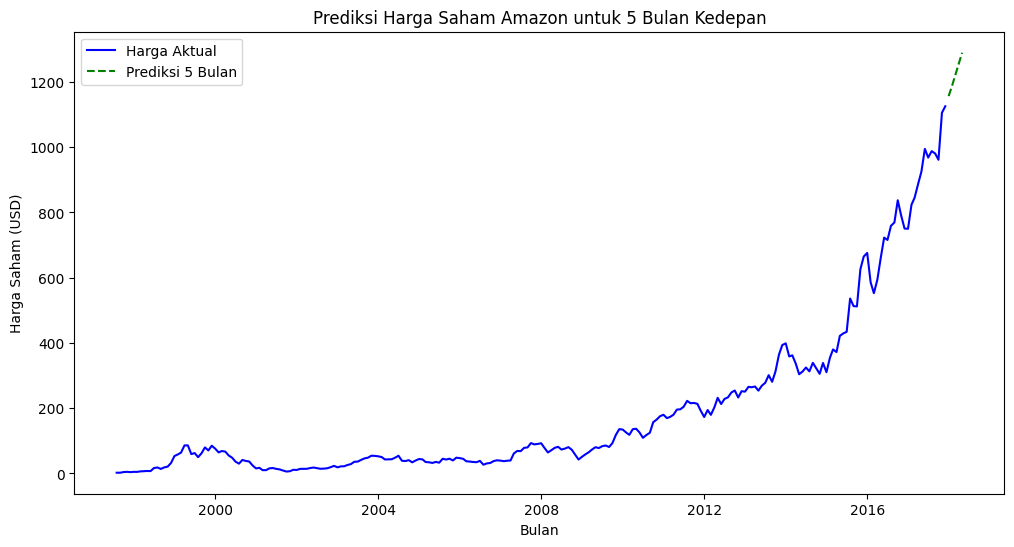

In [ ]:
# Visualisasi prediksi 5 bulan ke depan
plt.figure(figsize=(12,6))
plt.plot(df_monthly['Date'], df_monthly['Close'], label='Harga Aktual', color='blue')
plt.plot(predictions_5_months_df['Month'], predictions_5_months_df['Predicted Close'], label='Prediksi 5 Bulan', color='green', linestyle='--')
plt.title('Prediksi Harga Saham Amazon untuk 5 Bulan Kedepan')
plt.xlabel('Bulan')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

# **PERUSAHAAN BP PLC**

In [ ]:
# Mengimpor pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# MEMBACA DATASET DARI GOOGLE COLAB
df = pd.read_csv('bp.us.csv')
df.info() # Menampilkan informasi data untuk mengidentifikasi missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3201 non-null   object 
 1   Open     3201 non-null   float64
 2   High     3201 non-null   float64
 3   Low      3201 non-null   float64
 4   Close    3201 non-null   float64
 5   Volume   3201 non-null   int64  
 6   OpenInt  3201 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 175.2+ KB


In [ ]:
# KONVERSI TIPE DATA DATETIME
df['Date'] = pd.to_datetime(df['Date']) # Mengkonversi tipe data pada kolom 'Date' menjadi Datetime.
df.set_index('Date', inplace=True) # Mengubah kolom 'Date' menjadi yang terbaru
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2005-02-25,44.481,44.832,44.318,44.667,10446437,0
2005-02-28,45.175,45.341,43.969,44.566,7457456,0
2005-03-01,44.455,44.552,43.932,44.009,6613258,0
2005-03-02,43.645,44.577,43.631,44.379,6526293,0
2005-03-03,44.785,44.914,44.552,44.914,4661492,0


In [ ]:
# Mengambil data bulanan menggunakan resampling
df_monthly = df['Close'].resample('M').last()  # Mengambil harga penutupan bulanan
df_monthly

<ipython-input-20-1b09ae7c93a1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').last()  # Mengambil harga penutupan bulanan


,Close
Date,
2005-02-28,44.566
2005-03-31,42.834
2005-04-30,41.806
2005-05-31,41.324
2005-06-30,42.821
...,...
2017-07-31,34.075
2017-08-31,34.235
2017-09-30,37.882


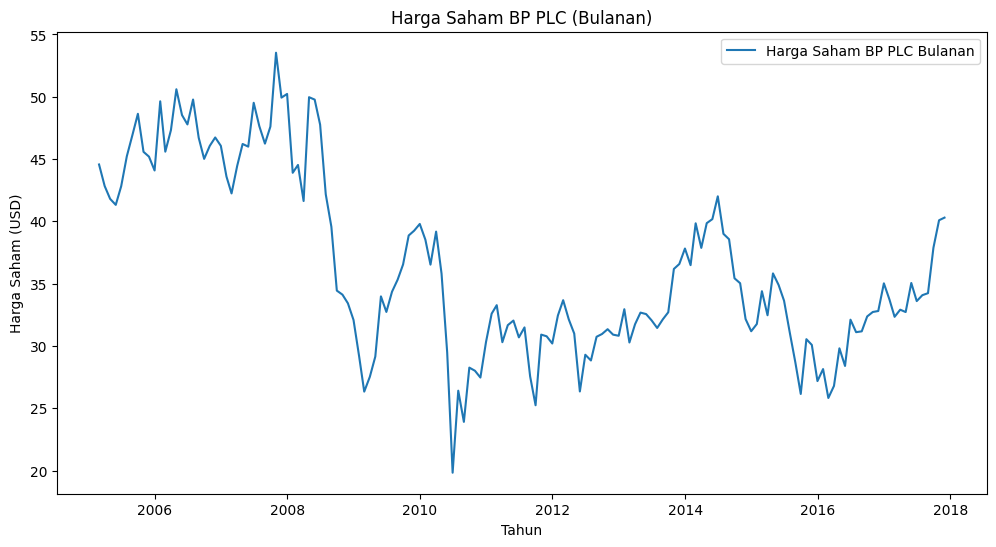

In [ ]:
# Visualisasi data bulanan
plt.figure(figsize=(12,6))
plt.plot(df_monthly, label='Harga Saham BP PLC Bulanan')
plt.title('Harga Saham BP PLC (Bulanan)')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# Membuat fitur (X) dan target (Y)
df_monthly = df_monthly.reset_index()
df_monthly['Month'] = df_monthly['Date'].dt.month  # Ekstrak bulan
df_monthly['Prev Close'] = df_monthly['Close'].shift(1)  # Harga saham bulan sebelumnya
df_monthly = df_monthly.dropna()  # Menghapus NaN yang terbentuk

# Menentukan fitur dan target
X = df_monthly[['Prev Close']]  # Fitur: harga saham sebelumnya
Y = df_monthly['Close']  # Target: harga saham bulan ini

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, Y_train)

# Membuat prediksi pada data pengujian
predictions = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.636129271145398
R-squared: 0.8933396465006438


<class 'pandas.core.series.Series'>
Index: 31 entries, 85 to 114
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


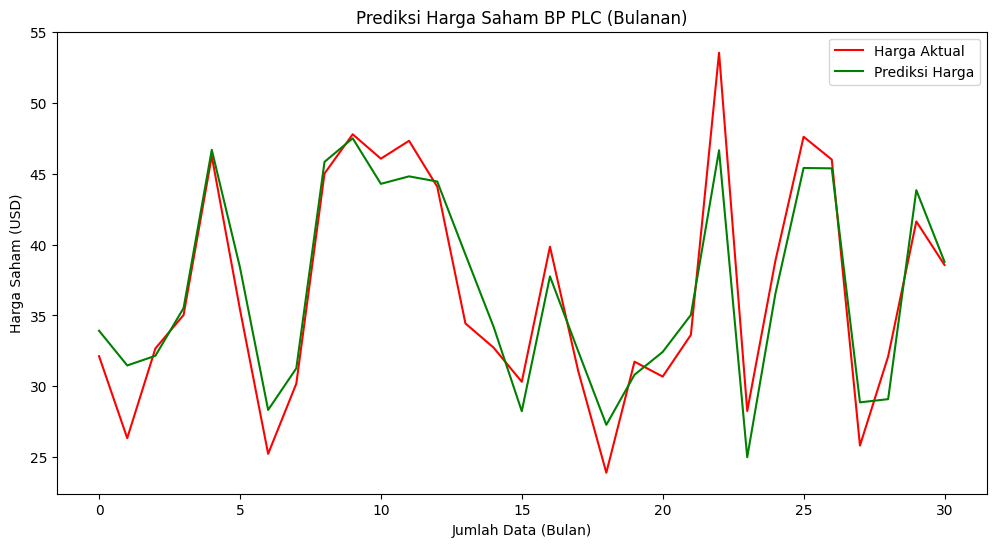

In [ ]:
# Visualisasi hasil prediksi dan data aktual
Y_test.info()
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Harga Aktual', color='red')
plt.plot(predictions, label='Prediksi Harga', color='green')
plt.title('Prediksi Harga Saham BP PLC (Bulanan)')
plt.xlabel('Jumlah Data (Bulan)')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# Prediksi 5 bulan ke depan berdasarkan model yang telah dilatih
# Menggunakan harga bulan terakhir (bulan terakhir dalam data pelatihan) untuk prediksi
last_month_close = df_monthly['Close'].iloc[-1]
predictions_5_months = []

# Lakukan prediksi untuk 5 bulan ke depan
for _ in range(5):  # Mengubah 6 menjadi 5 untuk prediksi 5 bulan
    next_month_pred = model.predict(np.array([[last_month_close]]))
    predictions_5_months.append(next_month_pred[0])
    last_month_close = next_month_pred[0]  # Update harga untuk bulan berikutnya

# Menampilkan prediksi 5 bulan ke depan
predicted_months = [df_monthly['Date'].iloc[-1] + pd.DateOffset(months=i) for i in range(1, 6)]  # Ubah 6 menjadi 5
predictions_5_months_df = pd.DataFrame({'Month': predicted_months, 'Predicted Close': predictions_5_months})

print("Prediksi Harga Saham BP PLC untuk 5 Bulan Kedepan:")
print(predictions_5_months_df)

Prediksi Harga Saham BP PLC untuk 5 Bulan Kedepan:
       Month  Predicted Close
0 2017-12-30        39.977702
1 2018-01-30        39.683213
2 2018-02-28        39.414134
3 2018-03-30        39.168272
4 2018-04-30        38.943624


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


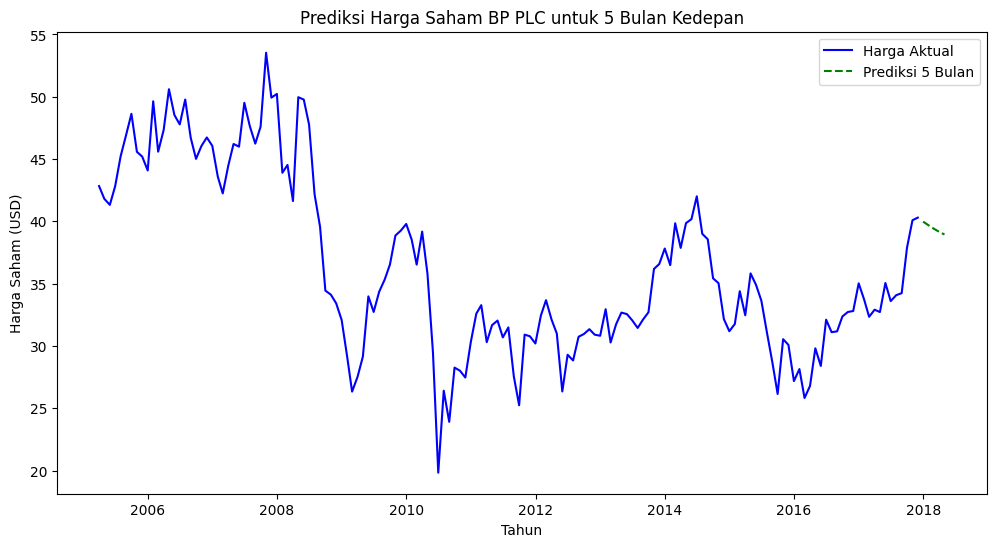

In [ ]:
# Visualisasi prediksi 5 bulan ke depan
plt.figure(figsize=(12,6))
plt.plot(df_monthly['Date'], df_monthly['Close'], label='Harga Aktual', color='blue')
plt.plot(predictions_5_months_df['Month'], predictions_5_months_df['Predicted Close'], label='Prediksi 5 Bulan', color='green', linestyle='--')
plt.title('Prediksi Harga Saham BP PLC untuk 5 Bulan Kedepan')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

# **PERUSAHAAN CHOC**

In [ ]:
# Mengimpor pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# MEMBACA DATASET DARI GOOGLE COLAB
df = pd.read_csv('choc.us.csv')
df.info() # Menampilkan informasi data untuk mengidentifikasi missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1418 non-null   object 
 1   Open     1418 non-null   float64
 2   High     1418 non-null   float64
 3   Low      1418 non-null   float64
 4   Close    1418 non-null   float64
 5   Volume   1418 non-null   int64  
 6   OpenInt  1418 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 77.7+ KB


In [ ]:
# KONVERSI TIPE DATA DATETIME
df['Date'] = pd.to_datetime(df['Date']) # Mengkonversi tipe data pada kolom 'Date' menjadi Datetime.
df.set_index('Date', inplace=True) # Mengubah kolom 'Date' menjadi yang terbaru
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2011-05-02,53.63,53.63,52.62,52.82,2900,0
2011-05-03,51.92,52.67,51.92,52.57,7100,0
2011-05-04,52.91,52.94,50.55,50.61,14351,0
2011-05-05,49.17,49.50,48.90,48.90,6851,0
2011-05-06,49.62,49.62,49.62,49.62,100,0


In [ ]:
# Mengambil data bulanan menggunakan resampling
df_monthly = df['Close'].resample('M').last()  # Mengambil harga penutupan bulanan
df_monthly

<ipython-input-25-1b09ae7c93a1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').last()  # Mengambil harga penutupan bulanan


,Close
Date,
2011-05-31,48.6600
2011-06-30,49.9300
2011-07-31,47.6800
2011-08-31,49.4500
2011-09-30,40.9600
...,...
2017-07-31,31.1599
2017-08-31,28.5500
2017-09-30,30.3500


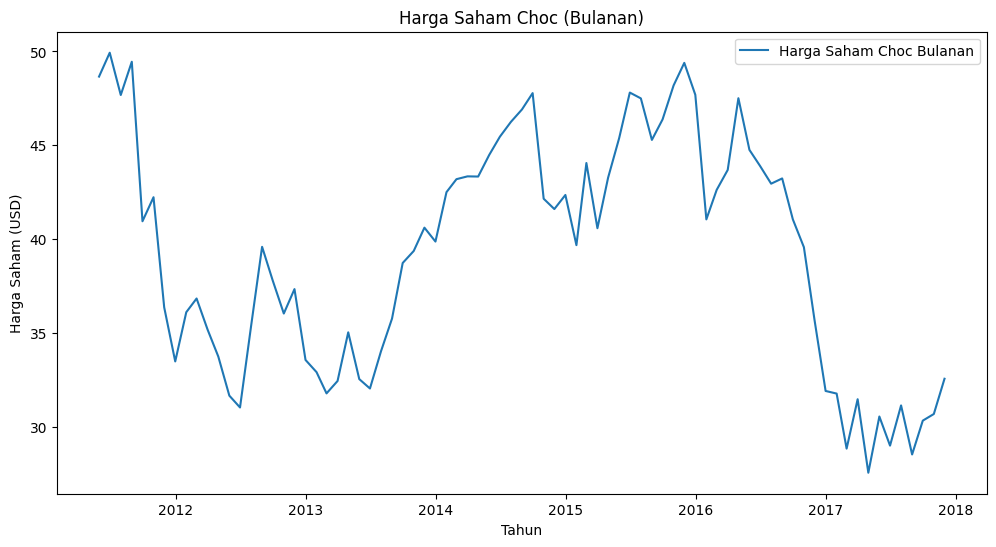

In [ ]:
# Visualisasi data bulanan
plt.figure(figsize=(12,6))
plt.plot(df_monthly, label='Harga Saham Choc Bulanan')
plt.title('Harga Saham Choc (Bulanan)')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# Membuat fitur (X) dan target (Y)
df_monthly = df_monthly.reset_index()
df_monthly['Month'] = df_monthly['Date'].dt.month  # Ekstrak bulan
df_monthly['Prev Close'] = df_monthly['Close'].shift(1)  # Harga saham bulan sebelumnya
df_monthly = df_monthly.dropna()  # Menghapus NaN yang terbentuk

# Menentukan fitur dan target
X = df_monthly[['Prev Close']]  # Fitur: harga saham sebelumnya
Y = df_monthly['Close']  # Target: harga saham bulan ini

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, Y_train)

# Membuat prediksi pada data pengujian
predictions = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.917486601780923
R-squared: 0.8848118202444178


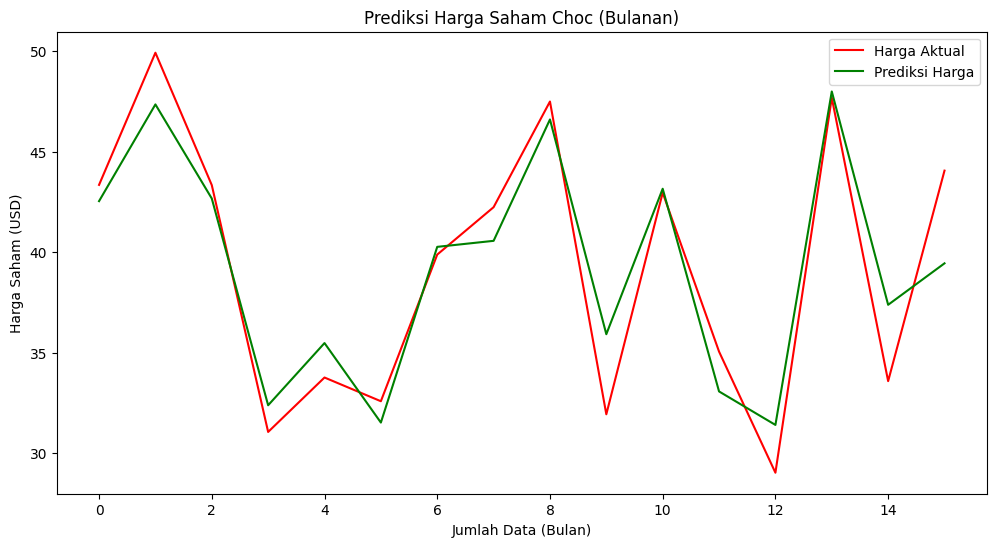

In [ ]:
# Visualisasi hasil prediksi dan data aktual
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Harga Aktual', color='red')
plt.plot(predictions, label='Prediksi Harga', color='green')
plt.title('Prediksi Harga Saham Choc (Bulanan)')
plt.xlabel('Jumlah Data (Bulan)')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# Prediksi 5 bulan ke depan berdasarkan model yang telah dilatih
# Menggunakan harga bulan terakhir (bulan terakhir dalam data pelatihan) untuk prediksi
last_month_close = df_monthly['Close'].iloc[-1]
predictions_5_months = []

# Lakukan prediksi untuk 5 bulan ke depan
for _ in range(5):  # Mengubah 6 menjadi 5 untuk prediksi 5 bulan
    next_month_pred = model.predict(np.array([[last_month_close]]))
    predictions_5_months.append(next_month_pred[0])
    last_month_close = next_month_pred[0]  # Update harga untuk bulan berikutnya

# Menampilkan prediksi 5 bulan ke depan
predicted_months = [df_monthly['Date'].iloc[-1] + pd.DateOffset(months=i) for i in range(1, 6)]  # Ubah 6 menjadi 5
predictions_5_months_df = pd.DataFrame({'Month': predicted_months, 'Predicted Close': predictions_5_months})

print("Prediksi Harga Saham Choc untuk 5 Bulan Kedepan:")
print(predictions_5_months_df)

Prediksi Harga Saham Choc untuk 5 Bulan Kedepan:
       Month  Predicted Close
0 2017-12-30        33.171873
1 2018-01-30        33.694845
2 2018-02-28        34.156156
3 2018-03-30        34.563078
4 2018-04-30        34.922022


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<class 'pandas.core.series.Series'>
Index: 16 entries, 34 to 45
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
16 non-null     float64
dtypes: float64(1)
memory usage: 256.0 bytes


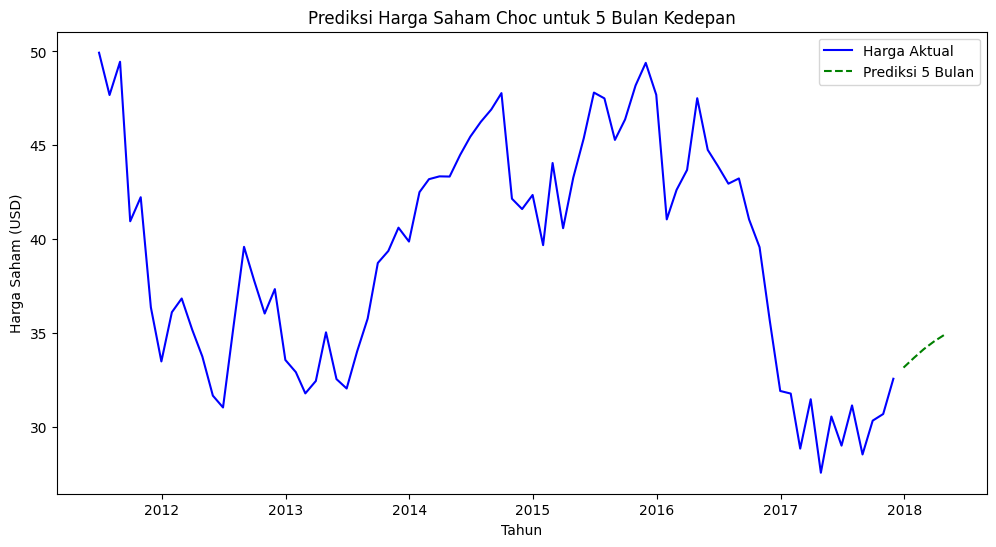

In [ ]:
# Visualisasi prediksi 5 bulan ke depan
Y_test.info()
plt.figure(figsize=(12,6))
plt.plot(df_monthly['Date'], df_monthly['Close'], label='Harga Aktual', color='blue')
plt.plot(predictions_5_months_df['Month'], predictions_5_months_df['Predicted Close'], label='Prediksi 5 Bulan', color='green', linestyle='--')
plt.title('Prediksi Harga Saham Choc untuk 5 Bulan Kedepan')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

# **PERUSAHAAN FCOM**

In [ ]:
# Mengimpor pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# MEMBACA DATASET DARI GOOGLE COLAB
df = pd.read_csv('fcom.us.csv')
df.info() # Menampilkan informasi data untuk mengidentifikasi missing values.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1018 non-null   object 
 1   Open     1018 non-null   float64
 2   High     1018 non-null   float64
 3   Low      1018 non-null   float64
 4   Close    1018 non-null   float64
 5   Volume   1018 non-null   int64  
 6   OpenInt  1018 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 55.8+ KB


In [ ]:
# KONVERSI TIPE DATA DATETIME
df['Date'] = pd.to_datetime(df['Date']) # Mengkonversi tipe data pada kolom 'Date' menjadi Datetime.
df.set_index('Date', inplace=True) # Mengubah kolom 'Date' menjadi yang terbaru
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2013-10-29,22.952,23.141,22.923,23.103,14762,0
2013-10-30,23.319,23.319,22.923,23.023,11481,0
2013-10-31,23.927,23.927,22.725,22.904,8051,0
2013-11-01,23.200,23.200,22.655,22.752,13609,0
2013-11-04,22.870,22.985,22.825,22.985,5343,0


In [ ]:
# Mengambil data bulanan menggunakan resampling
df_monthly = df['Close'].resample('M').last()  # Mengambil harga penutupan bulanan
df_monthly

<ipython-input-31-1b09ae7c93a1>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close'].resample('M').last()  # Mengambil harga penutupan bulanan


,Close
Date,
2013-10-31,22.9040
2013-11-30,22.5280
2013-12-31,23.1280
2014-01-31,22.6140
2014-02-28,22.3440
2014-03-31,23.5080
2014-04-30,23.4450
2014-05-31,24.3700
2014-06-30,24.3880


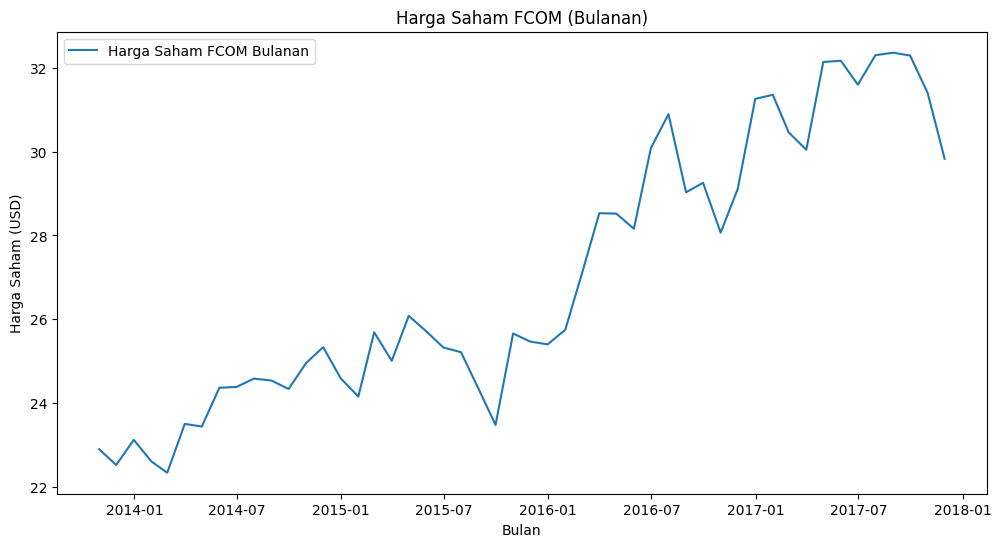

In [ ]:
# Visualisasi data bulanan
plt.figure(figsize=(12,6))
plt.plot(df_monthly, label='Harga Saham FCOM Bulanan')
plt.title('Harga Saham FCOM (Bulanan)')
plt.xlabel('Bulan')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# Membuat fitur (X) dan target (Y)
df_monthly = df_monthly.reset_index()
df_monthly['Month'] = df_monthly['Date'].dt.month  # Ekstrak bulan
df_monthly['Prev Close'] = df_monthly['Close'].shift(1)  # Harga saham bulan sebelumnya
df_monthly = df_monthly.dropna()  # Menghapus NaN yang terbentuk

# Menentukan fitur dan target
X = df_monthly[['Prev Close']]  # Fitur: harga saham sebelumnya
Y = df_monthly['Close']  # Target: harga saham bulan ini

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, Y_train)

# Membuat prediksi pada data pengujian
predictions = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8357071284408162
R-squared: 0.9054541761970588


<class 'pandas.core.series.Series'>
Index: 10 entries, 14 to 20
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


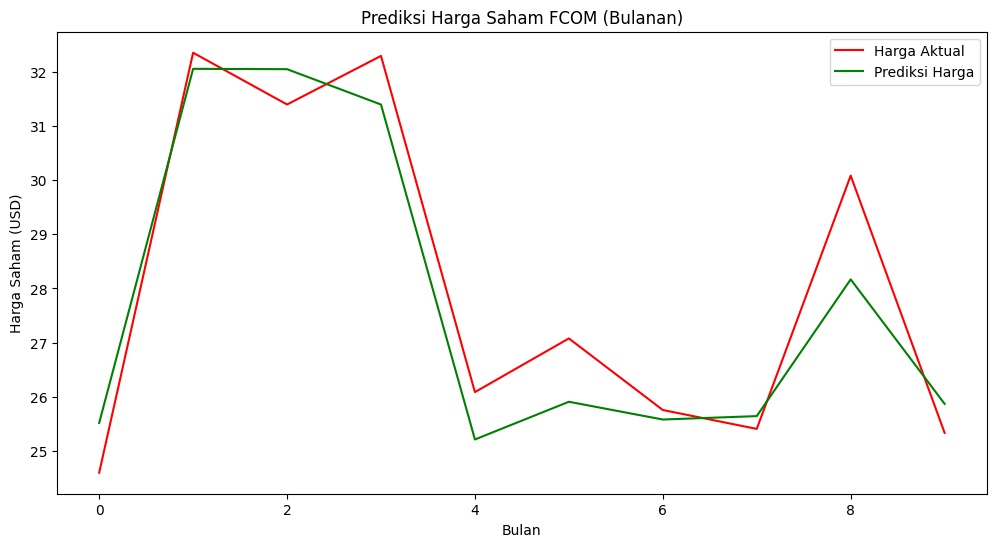

In [ ]:
# Visualisasi hasil prediksi dan data aktual
Y_test.info()
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Harga Aktual', color='red')
plt.plot(predictions, label='Prediksi Harga', color='green')
plt.title('Prediksi Harga Saham FCOM (Bulanan)')
plt.xlabel('Bulan')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()

In [ ]:
# Prediksi 5 bulan ke depan berdasarkan model yang telah dilatih
# Menggunakan harga bulan terakhir (bulan terakhir dalam data pelatihan) untuk prediksi
last_month_close = df_monthly['Close'].iloc[-1]
predictions_5_months = []

# Lakukan prediksi untuk 5 bulan ke depan
for _ in range(5):  # Mengubah 6 menjadi 5 untuk prediksi 5 bulan
    next_month_pred = model.predict(np.array([[last_month_close]]))
    predictions_5_months.append(next_month_pred[0])
    last_month_close = next_month_pred[0]  # Update harga untuk bulan berikutnya

# Menampilkan prediksi 5 bulan ke depan
predicted_months = [df_monthly['Date'].iloc[-1] + pd.DateOffset(months=i) for i in range(1, 6)]  # Ubah 6 menjadi 5
predictions_5_months_df = pd.DataFrame({'Month': predicted_months, 'Predicted Close': predictions_5_months})

print("Prediksi Harga Saham FCOM untuk 5 Bulan Kedepan:")
print(predictions_5_months_df)

Prediksi Harga Saham FCOM untuk 5 Bulan Kedepan:
       Month  Predicted Close
0 2017-12-30        29.738605
1 2018-01-30        29.652860
2 2018-02-28        29.572237
3 2018-03-30        29.496432
4 2018-04-30        29.425157


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


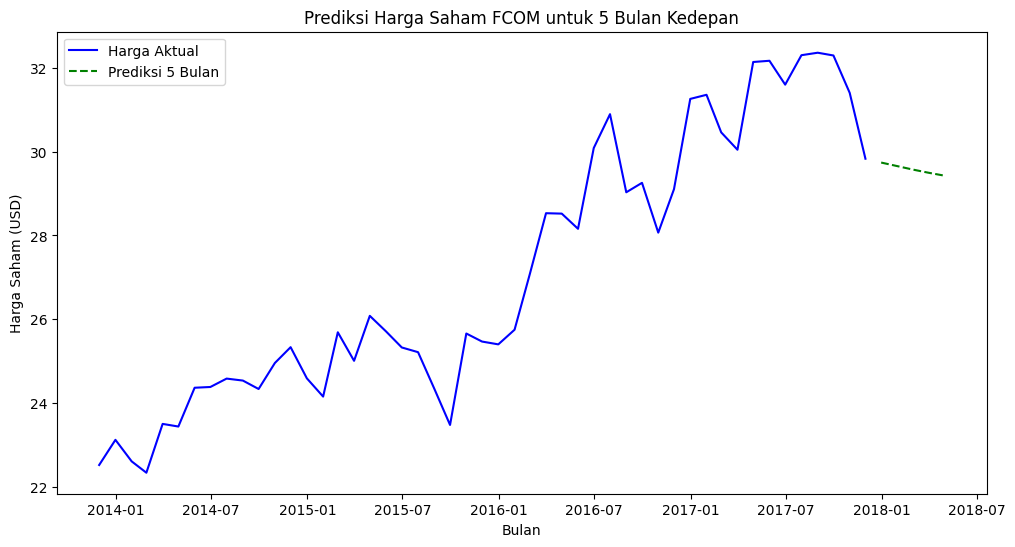

In [ ]:
# Visualisasi prediksi 5 bulan ke depan
Y_test.info()
plt.figure(figsize=(12,6))
plt.plot(df_monthly['Date'], df_monthly['Close'], label='Harga Aktual', color='blue')
plt.plot(predictions_5_months_df['Month'], predictions_5_months_df['Predicted Close'], label='Prediksi 5 Bulan', color='green', linestyle='--')
plt.title('Prediksi Harga Saham FCOM untuk 5 Bulan Kedepan')
plt.xlabel('Bulan')
plt.ylabel('Harga Saham (USD)')
plt.legend()
plt.show()